In [865]:
import imp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy 
from bisect import bisect

In [866]:



dataset = pd.read_csv("C:/Users/teddy/Downloads/Machine Learning/Adeline Code/Astro - Sheet1.csv")


dataset.head()

,RANK,PROPER NAME,GREEK LETTER NAME,CLASS,DIST (LY),APP MAG,ABS MAG,RAD VEL (km/s),VEL (km/s),REMARKS
0,1,Sirius,Alpha CMa,A1V,8.6,-1.46,1.43,-8.0,19.0,White dwarf companion
1,2,Canopus,Alpha Car,F0II,309,-0.72,-5.6,21.0,25.0,X-rays from hot corona; may become neon white ...
2,3,Rigil Kentaurus A,Alpha Cen A,G2V,4.36,-0.01,4.34,-23.0,33.0,"Companion Proxima Cen, 11.05 mag, M5.5V"
3,3,Rigil Kentaurus B,Alpha Cen B,K1V,4.36,1.33,5.68,-23.0,33.0,Combined magnitude -0.29; by itself would rank...
4,4,Arcturus,Alpha Boo,K1.5III,37,-0.04,-0.3,-5.0,122.0,High velocity


In [867]:
import os
distance = pd.read_csv("C:/Users/teddy/Downloads/Machine Learning/Adeline Code/distance.csv")
distance.head()

,Designation,Unnamed: 1,Distance\n(ly (±err))[6]→→,Constellation,"Coordinates:\nRA, Dec\n(Ep J2000, Eq J2000)[5]",Stellar\nclass,Mass,Magnitude (mV[5] or mJ),Unnamed: 8,Parallax\n(mas\n(±err))\n[5][note 1],Notes and additional\nreferences
0,System,Star or (sub-) brown dwarf,NaN,NaN,NaN,NaN,M☉,App.,Abs.,NaN,NaN
1,Solar System,Sun (Sol)$,0.0000158,NaN,NaN,G2V[5],1,−26.74#,4.85,NaN,eight recognized planets and more dwarf planets
2,Alpha Centauri,"Proxima Centauri (C, V645 Centauri)",4.2465\n±0.0003,Cen*,14h 29m 43.0s\n−62° 40′ 46″,M5.5Ve,0.122,11.09,15.53,768.0665\n±0.0499[7],"flare star, two confirmed planets (b, 2016, an..."
3,NaN,Rigil Kentaurus (A)$,4.3441\n±0.0022,NaN,14h 39m 36.5s\n−60° 50′ 02″,G2V[5],1.079,0.01#,4.38,750.81\n±0.38[12],one directly-imaged habitable-zone planet cand...
4,NaN,Toliman (B)$,NaN,NaN,14h 39m 35.1s\n−60° 50′ 14″,K1V[5],0.909,1.34#,5.71,NaN,one suspected planet (c) (2013)\n(planet b ref...


In [868]:
ds_clean= distance.dropna()
ds_clean.head()

,Designation,Unnamed: 1,Distance\n(ly (±err))[6]→→,Constellation,"Coordinates:\nRA, Dec\n(Ep J2000, Eq J2000)[5]",Stellar\nclass,Mass,Magnitude (mV[5] or mJ),Unnamed: 8,Parallax\n(mas\n(±err))\n[5][note 1],Notes and additional\nreferences
2,Alpha Centauri,"Proxima Centauri (C, V645 Centauri)",4.2465\n±0.0003,Cen*,14h 29m 43.0s\n−62° 40′ 46″,M5.5Ve,0.122,11.09,15.53,768.0665\n±0.0499[7],"flare star, two confirmed planets (b, 2016, an..."
6,Luhman 16\n(WISE 1049−5319),A§,6.5029\n±0.0011,Car*,10h 49m 18.9s\n−53° 19′ 10″,L8±1[16],0.032,10.7 J,14.2 J,501.557\n±0.082[17],one refuted planet (Ab[18] in 2017[19])
11,Alpha Canis Majoris,Sirius (A)$,8.7094\n±0.0054,CMa*,06h 45m 08.9s\n−16° 42′ 58″,A1V[5],2.063,−1.46#,1.42,374.4896\n±0.2313[7],brightest star in the night sky
13,Luyten 726-8 (Gliese 65),A (BL Ceti),8.724\n±0.012,Cet*,01h 39m 01.3s\n−17° 57′ 01″,M5.5Ve,0.102,12.54,15.4,373.8443\n±0.5009[7],flare star (Archetypal member)
20,"EZ Aquarii\n(Gliese 866, Luyten 789-6)",A,11.109\n±0.034,Aqr*,22h 38m 33.4s\n−15° 17′ 57″,M5.0Ve,0.11,13.33,15.64,293.60\n±0.9[25],A & B flare stars


In [875]:
# Rows that do not meet the condition alpha + num are eliminated
# f = lambda s: (len(s) >= 2)  and (s[0].isalpha()) and (s[1].isdigit())
# i  = ds_clean.iloc[:,5].apply(f)
# df_clean = ds_clean[i]

# # A new column is created with the first two characters from 'SpType'
# f = lambda s: s[0:5]
# ds_clean.iloc[:,11] = ds_clean.iloc[:,5].apply(f)


# Rows that do not meet the condition alpha + num are eliminated
f = lambda s: (len(s) >= 3)  and (s[0].isalpha()) and (s[1].isdigit())
i  = ds_clean['Stellar\nclass'].apply(f)
df_clean = ds_clean[i]

# A new column is created with the first two characters from 'CLASS'
f = lambda s: s[0:5]
#ds_clean['Stellar2'] = ds_clean['Stellar\nclass'].apply(f)
ds_clean.iloc[:,11] = ds_clean.iloc[:,5].apply(f)
df_clean.head()

c:\Users\teddy\anaconda3\lib\site-packages\pandas\core\indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value


,Designation,Unnamed: 1,Distance\n(ly (±err))[6]→→,Constellation,"Coordinates:\nRA, Dec\n(Ep J2000, Eq J2000)[5]",Stellar\nclass,Mass,Magnitude (mV[5] or mJ),Unnamed: 8,Parallax\n(mas\n(±err))\n[5][note 1],Notes and additional\nreferences,Stellar\nclass2,Stellar2
2,Alpha Centauri,"Proxima Centauri (C, V645 Centauri)",4.2465\n±0.0003,Cen*,14h 29m 43.0s\n−62° 40′ 46″,M5.5Ve,0.122,11.09,15.53,768.0665\n±0.0499[7],"flare star, two confirmed planets (b, 2016, an...",M5.5V,M5.5V
6,Luhman 16\n(WISE 1049−5319),A§,6.5029\n±0.0011,Car*,10h 49m 18.9s\n−53° 19′ 10″,L8±1[16],0.032,10.7 J,14.2 J,501.557\n±0.082[17],one refuted planet (Ab[18] in 2017[19]),L8±1[,L8±1[
11,Alpha Canis Majoris,Sirius (A)$,8.7094\n±0.0054,CMa*,06h 45m 08.9s\n−16° 42′ 58″,A1V[5],2.063,−1.46#,1.42,374.4896\n±0.2313[7],brightest star in the night sky,A1V[5,A1V[5
13,Luyten 726-8 (Gliese 65),A (BL Ceti),8.724\n±0.012,Cet*,01h 39m 01.3s\n−17° 57′ 01″,M5.5Ve,0.102,12.54,15.4,373.8443\n±0.5009[7],flare star (Archetypal member),M5.5V,M5.5V
20,"EZ Aquarii\n(Gliese 866, Luyten 789-6)",A,11.109\n±0.034,Aqr*,22h 38m 33.4s\n−15° 17′ 57″,M5.0Ve,0.11,13.33,15.64,293.60\n±0.9[25],A & B flare stars,M5.0V,M5.0V


Let's see what are the spectral classes present in the dataframe

In [846]:
f = lambda s: s[0]
clases = dataset['CLASS'].map(f)
clases.value_counts()

B    56
A    35
K    34
G    19
F    15
M    10
O     4
W     1
Name: CLASS, dtype: int64

We'll now remove lines with Special Classes C N, R and S to keep only those in the sequence OBAFGKM

In [847]:
f = lambda s: s[0] in 'OBAFGKM'
df_clean = dataset[dataset['CLASS'].map(f)]


Check

In [848]:
f = lambda s: s[0]
clases = df_clean['CLASS'].map(f)
clases.value_counts()

B    56
A    35
K    34
G    19
F    15
M    10
O     4
Name: CLASS, dtype: int64

In [849]:

# Rows that do not meet the condition alpha + num are eliminated
f = lambda s: (len(s) >= 3)  and (s[0].isalpha()) and (s[1].isdigit())
i  = df_clean['CLASS'].apply(f)
df_clean = df_clean[i]

# A new column is created with the first two characters from 'CLASS'
f = lambda s: s[0:3]
df_clean['CLASS2'] = df_clean['CLASS'].apply(f)

df_copy = copy.deepcopy(df_clean)
df_clean =df_clean.iloc[:32]

df_clean.tail()

,RANK,PROPER NAME,GREEK LETTER NAME,CLASS,DIST (LY),APP MAG,ABS MAG,RAD VEL (km/s),VEL (km/s),REMARKS,CLASS2
27,26,Bellatrix,Gamma Ori,B2III,245,1.64,-2.72,18.0,19.0,Slightly variable,B2I
28,27,Elnath,Beta Tau,B7III,130,1.65,-1.37,9.0,35.0,Also Gamma Aurigae,B7I
29,28,Miaplacidus,Beta Car,A2IV,111,1.68,-1.98,-5.0,31.0,"With Atria, one of two brightest near SCP",A2I
30,29,Alnilam,Epsilon Ori,B0Ia,1340,1.70,-6.6,26.0,26.0,Central Belt star,B0I
31,30,Alnitak,Zeta Ori,O9.5Ibe+B0III,815,1.74,-5.5,16.0,17.0,Eastern Belt star; visual binary,O9.


The purpose is to make a graph where on the horizontal axis are the spectral classes included in the Morgan-Keenan system (MKK) "OBAFGKM", followed by a digit 0-9. In addition we want that the spectral classes appear ordered precisely in this order (B5 before A0...). So I'm going to replace the letters by digits in ascending sequence in the CLASS2 column, in order to sort by that column.

In [850]:

orden = {'O':'0', 'B':'1', 'A':'2', 'F':'3', 'G':'4', 'K':'5', 'M':'6'}
f = lambda s: orden[s[0]]+s[1]
df_clean['CLASS2'] = df_clean['CLASS2'].apply(f)

df_clean =df_clean.sort_values(by=['ABS MAG'])

df_clean.tail()

,RANK,PROPER NAME,GREEK LETTER NAME,CLASS,DIST (LY),APP MAG,ABS MAG,RAD VEL (km/s),VEL (km/s),REMARKS,CLASS2
19,18,Fomalhaut,Alpha PsA,A3V,25,1.16,1.73,7.0,15.0,Dusty circumstellar disk and a planet,23
12,12,Altair,Alpha Aql,A7V,16.7,0.77,2.22,-26.0,30.0,"Rapid rotator, oblate",27
8,8,Procyon,Alpha CMi,F5IV-V,11.5,0.34,2.61,-3.0,21.0,White dwarf companion,35
2,3,Rigil Kentaurus A,Alpha Cen A,G2V,4.36,-0.01,4.34,-23.0,33.0,"Companion Proxima Cen, 11.05 mag, M5.5V",42
3,3,Rigil Kentaurus B,Alpha Cen B,K1V,4.36,1.33,5.68,-23.0,33.0,Combined magnitude -0.29; by itself would rank...,51


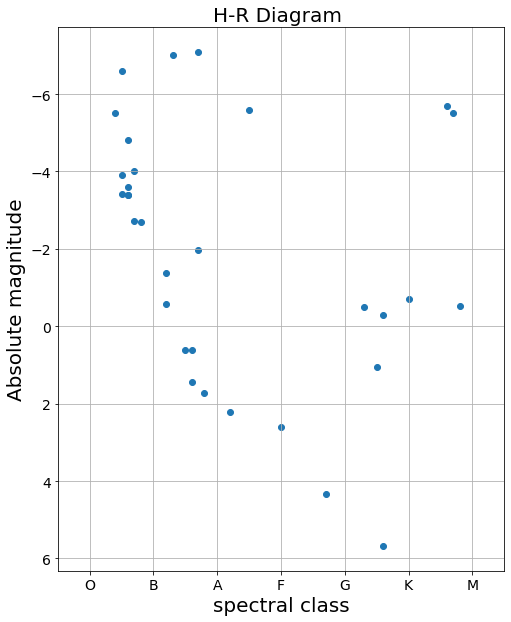

In [851]:
fig, ax = plt.subplots(figsize=(8,10))



ax.set_xlim(0, 70)

ax.invert_yaxis()
#ax.set_ylim(ymin= -10, ymax= 10, emit= False)
#ax.set_ylim(5, -5)


ax.grid()
ax.set_title('H-R Diagram ')

ax.title.set_fontsize(20)
ax.set_xlabel('spectral class')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Absolute magnitude')
ax.yaxis.label.set_fontsize(20)

ax.scatter(df_clean['CLASS2'].astype(int), df_clean['ABS MAG'].astype(float))
           #,s=50, edgecolors='none', alpha=0.015, c='k')
ax.set_xticks(range(5,75,10))
ax.set_xticklabels(['O', 'B', 'A', 'F', 'G', 'K', 'M'])
ax.tick_params(axis='both', labelsize=14)

In [852]:
df_clean['abs mags greater'] = np.where(df_clean['ABS MAG'].astype(float) > df_clean['APP MAG'].astype(float), 'True', 'False') #create a new column in df_clean
df_clean.head()




,RANK,PROPER NAME,GREEK LETTER NAME,CLASS,DIST (LY),APP MAG,ABS MAG,RAD VEL (km/s),VEL (km/s),REMARKS,CLASS2,abs mags greater
4,4,Arcturus,Alpha Boo,K1.5III,37,-0.04,-0.3,-5.0,122.0,High velocity,51,False
6,6,Capella,Alpha Aur,G8III+G0III,43,0.08,-0.51,30.0,40.0,"Close binary, mags. 0.76 and 0.91",48,False
25,24,Gacrux,Gamma Cru,M3.5III,88,1.63,-0.52,21.0,40.0,Mild barium star,63,False
22,21,Regulus,Alpha Leo,B7V,79,1.35,-0.58,6.0,29.0,Binary red dwarf companion,17,False
15,14,Aldebaran,Alpha Tau,K5III,67,0.85,-0.7,54.0,57.0,In front of Hyades,55,False


In [853]:
df_clean['abs mags greater'].value_counts()

False    25
True      7
Name: abs mags greater, dtype: int64

In [854]:
df_clean.tail()

,RANK,PROPER NAME,GREEK LETTER NAME,CLASS,DIST (LY),APP MAG,ABS MAG,RAD VEL (km/s),VEL (km/s),REMARKS,CLASS2,abs mags greater
19,18,Fomalhaut,Alpha PsA,A3V,25,1.16,1.73,7.0,15.0,Dusty circumstellar disk and a planet,23,True
12,12,Altair,Alpha Aql,A7V,16.7,0.77,2.22,-26.0,30.0,"Rapid rotator, oblate",27,True
8,8,Procyon,Alpha CMi,F5IV-V,11.5,0.34,2.61,-3.0,21.0,White dwarf companion,35,True
2,3,Rigil Kentaurus A,Alpha Cen A,G2V,4.36,-0.01,4.34,-23.0,33.0,"Companion Proxima Cen, 11.05 mag, M5.5V",42,True
3,3,Rigil Kentaurus B,Alpha Cen B,K1V,4.36,1.33,5.68,-23.0,33.0,Combined magnitude -0.29; by itself would rank...,51,True


In [855]:
df_copy = df_copy.iloc[:51]

f = lambda s: 'VII' in s
b = df_copy['CLASS'].map(f)
print ("Class VII: white dwarfs, there are %d stars" %sum(b))

f = lambda s: ('VI' in s) and ('VII' not in s)
b = df_copy['CLASS'].map(f)
print ("Class VI: subdwarfs, there are %d stars" %sum(b))

f = lambda s: ('V' in s) and ('VI' not in s) and ('IV' not in s)
b = df_copy['CLASS'].map(f)
print ("Class V: main-sequence, there are %d stars" %sum(b))

f = lambda s: 'IV' in s
b = df_copy['CLASS'].map(f)
print ("Class IV: subgiants, there are %d stars" %sum(b))

f = lambda s: 'III' in s
b = df_copy['CLASS'].map(f)
print ("Class III: giants, there are %d stars" %sum(b))

f = lambda s: ('II' in s) and ('III' not in s) and ('VII' not in s)
b = df_copy['CLASS'].map(f)
print ("Class II:  bright giants, there are %d stars" %sum(b))

f = lambda s: ('I' in s) and ('II' not in s) and ('V' not in s)
b = df_copy['CLASS'].map(f)
print ("Class I: supergiants, there are %d stars" %sum(b))

Class VII: white dwarfs, there are 0 stars
Class VI: subdwarfs, there are 0 stars
Class V: main-sequence, there are 14 stars
Class IV: subgiants, there are 8 stars
Class III: giants, there are 18 stars
Class II:  bright giants, there are 4 stars
Class I: supergiants, there are 7 stars
